Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.534 seconds.
Prefix dict has been built successfully.


['国产', '胡哥', '的琅', '胡歌', '好剧', '代名词', '人为', '名声', '名声', '游本昌', '好戏', '济公', '繁花', '跨度', '第一桶金', '第一桶金', '亏本', '情感', '经典', '理想', '典句', '大师', '老师', '感情', '东西', '人生', '感情', '东西', '天亮', '朋友', '伙伴', '男女', '天时地利', '空门', '细说', '阿宝', '雪芝', '雪芝', '香港', '阿宝', '幻想', '幻想', '雪芝', '样子', '芝会', '爱慕', '物质', '阿宝', '爱情', '雪芝', '雪芝', '态度', '理由', '雪芝', '阿宝', '雪芝', '地步', '男女', '单位', '性质', '阿宝', '集体', '工厂', '机修工', '雪芝', '全民', '单位', '售票员', '阿宝', '爸爸', '集体', '小厂', '机修工', '反革命', '子女', '雪芝', '雪芝', '阿宝', '大大方方', '阿宝', '工人', '新村', '阿宝', '哥哥', '垃圾', '地角', '垃圾', '阿宝', '爸爸', '雪芝', '阿宝', '陋室', '天气', '阴冷', '小清雪', '房间', '里静', '阿宝', '邮票', '丰子恺', '民国', '小学生', '雪芝', '腊梅', '阿宝', '雪芝', '枝桠', '笔墨', '阿宝', '雪芝', '阿宝', '雪芝', '阿宝', '落雪', '雪芝', '精神', '寒花', '初雪', '雪霁', '玻璃', '哈气', '雪芝', '雪气', '梅香', '雪芝', '天生天化', '桃三', '李四', '梅花', '费功夫', '阿宝', '腊梅', '真腊', '黄梅', '雪芝', '梅花', '阿宝', '寒花', '雪芝', '梅花', '寒香', '单枝', '数房', '阿宝', '雪芝', '阿宝', '棋子', '雪芝', '阿宝', '雪芝', '阿宝', '阿宝', '雪芝', '对子', '频昼', '香花', '雪芝', '窗玻璃', '阿宝', '雪芝', '心慧', '白梅', '小时', 

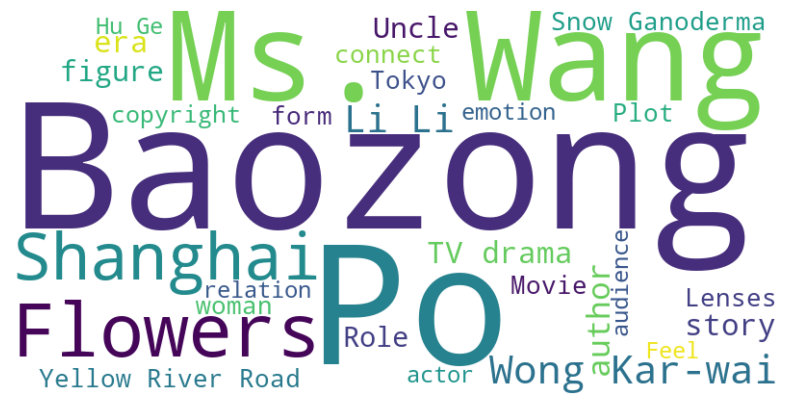

In [1]:
import pandas as pd
import jieba
import jieba.posseg as pseg  # 导入词性标注模块
from collections import Counter
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# 读取Excel文件
file_path = 'Blossoms_DouBan_Review.xlsx'
df = pd.read_excel(file_path)

# 添加自定义词汇
custom_words = ['和平饭店', '至真园', '泡饭', '排骨年糕', '蓝鱼秃肺拼海参', '红烧划水', '定胜糕', '油墩子', '川沙鸡爪', '牛河', '黄鱼面', '饭团', '鹤针', '舟王炒饭', '炎王蛇', '三文鱼', '鲶鱼', '茶叶蛋', '火锅', '辣肉面', '包子']
for word in custom_words:
    jieba.add_word(word)

# 获取评论内容列，并将其转换为字符串类型
comments = df['内容'].astype(str)

# 文本预处理：分词并进行词性标注，只保留名词
all_nouns = []
for comment in comments:
    words = pseg.cut(comment)  # 使用 jieba 进行分词并标注词性
    all_nouns.extend([word for word, flag in words if flag.startswith('n')])  # 只保留名词

# 读取扩展停用词库文件
with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    file_stop_words = set(f.read().splitlines())

# 定义并扩展停用词库
custom_stop_words = set([
    '的', '了', '和', '是', '我', '也', '在', '有', '就', '不', '人', '都', '这个', '上', '很', '你', '他', '她',
    '它', '我们', '他们', '她们', '自己', '所以', '因为', '这样', '这里', '那里', '什么', '但是', '如果', '那么',
    '还是', '虽然', '不过', '而且', '并且', '关于', '其中', '甚至', '一些', '还有', '或者', '所以', '其实', '另外', '其实',
    '以及', '就是', '与', '就', '最', '已经', '非常', '那么', '而', '并', '还', '其中', '所有', '所有的', '还有', '只是',
    '几乎', '其他', '而且', '但', '呢', '却', '哇', '哈', '吧', '啊', '的', '嘞', '啦', '吗', '呀'
])

# 将自定义停用词和文件中的停用词合并
stop_words = custom_stop_words.union(file_stop_words)

# 过滤停用词和长度小于2的词语
filtered_nouns = [word for word in all_nouns if word not in stop_words and len(word) > 1 and not re.match(r'^a.', word)]

# 检查过滤后的词语列表
print(filtered_nouns[:200])  # 打印前200个名词，查看过滤效果

# 统计名词词频
noun_freq = Counter(filtered_nouns)
common_nouns = noun_freq.most_common(30)
print(common_nouns)

# 使用 deep_translator 仅对高频词进行翻译
translator = GoogleTranslator(source='zh-CN', target='en')
translated_words = {translator.translate(word): freq for word, freq in common_nouns}

# 生成词云，使用默认字体生成英文词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(translated_words)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
